In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

# ✅ Load the correct dataset
df = pd.read_excel("Superstore.xlsx", engine='openpyxl')

# View first few rows
df.head()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:
#Data Cleaning
# Drop unnecessary columns
df.drop(columns=["Postal Code"], inplace=True)

# Check missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [15]:
#Total Sales and Profit
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()

print(f"Total Sales: ₹{total_sales:.2f}")
print(f"Total Profit: ₹{total_profit:.2f}")


Total Sales: ₹2297200.86
Total Profit: ₹286397.02


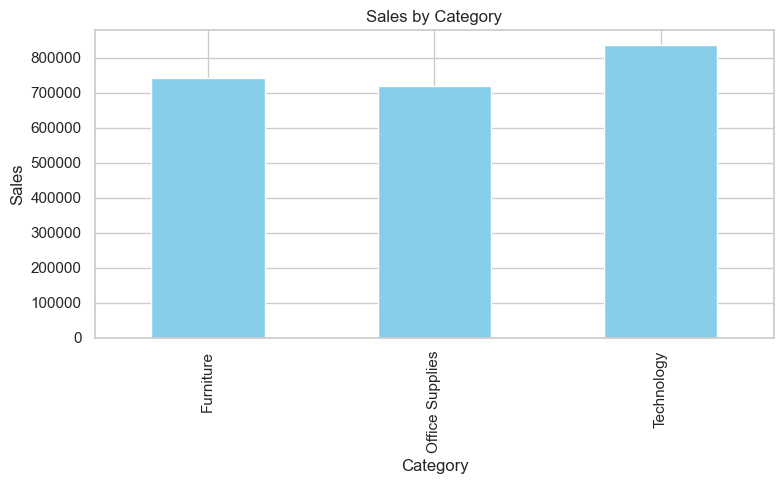

In [16]:
#Sales by Category
sales_by_category = df.groupby('Category')['Sales'].sum()

# Plot
plt.figure(figsize=(8,5))
sales_by_category.plot(kind='bar', color='skyblue')
plt.title("Sales by Category")
plt.ylabel("Sales")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

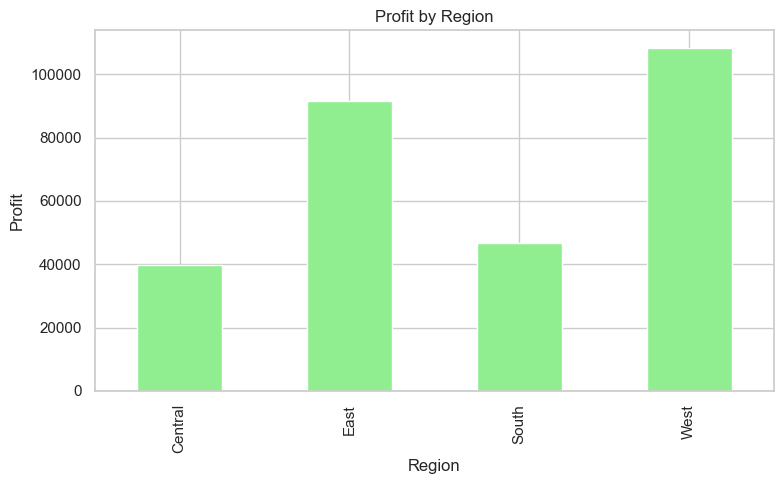

In [17]:
#Profit by Region
profit_by_region = df.groupby('Region')['Profit'].sum()

# Plot
plt.figure(figsize=(8,5))
profit_by_region.plot(kind='bar', color='lightgreen')
plt.title("Profit by Region")
plt.ylabel("Profit")
plt.xlabel("Region")
plt.tight_layout()
plt.show()


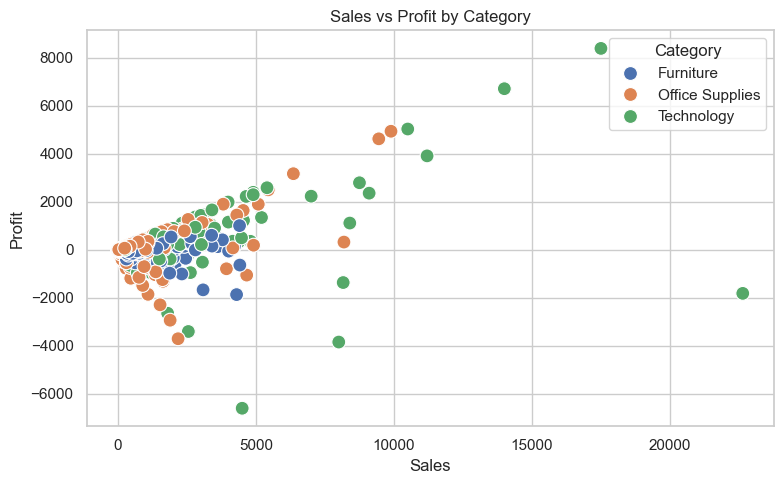

In [18]:
#Sales vs Profit
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category', s=100)
plt.title("Sales vs Profit by Category")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()


In [19]:
#Basic Dataset Overview
# Dataset shape and data types
print("Shape of dataset:", df.shape)
print("\nData Types:\n", df.dtypes)

# Null values
print("\nMissing Values:\n", df.isnull().sum())


Shape of dataset: (9994, 20)

Data Types:
 Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

Missing Values:
 Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0


/var/folders/jc/fyqm1cds6gg81w6_ng8_28_w0000gn/T/ipykernel_17616/581562906.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


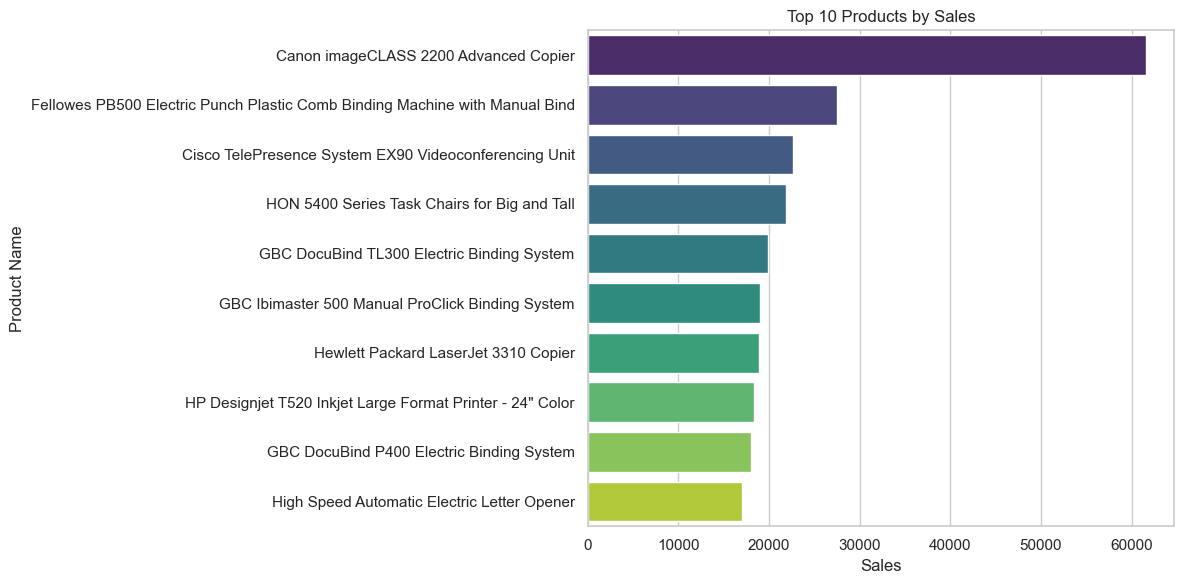

In [20]:
#Top 10 Products by Sales
top_products = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Sales")
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

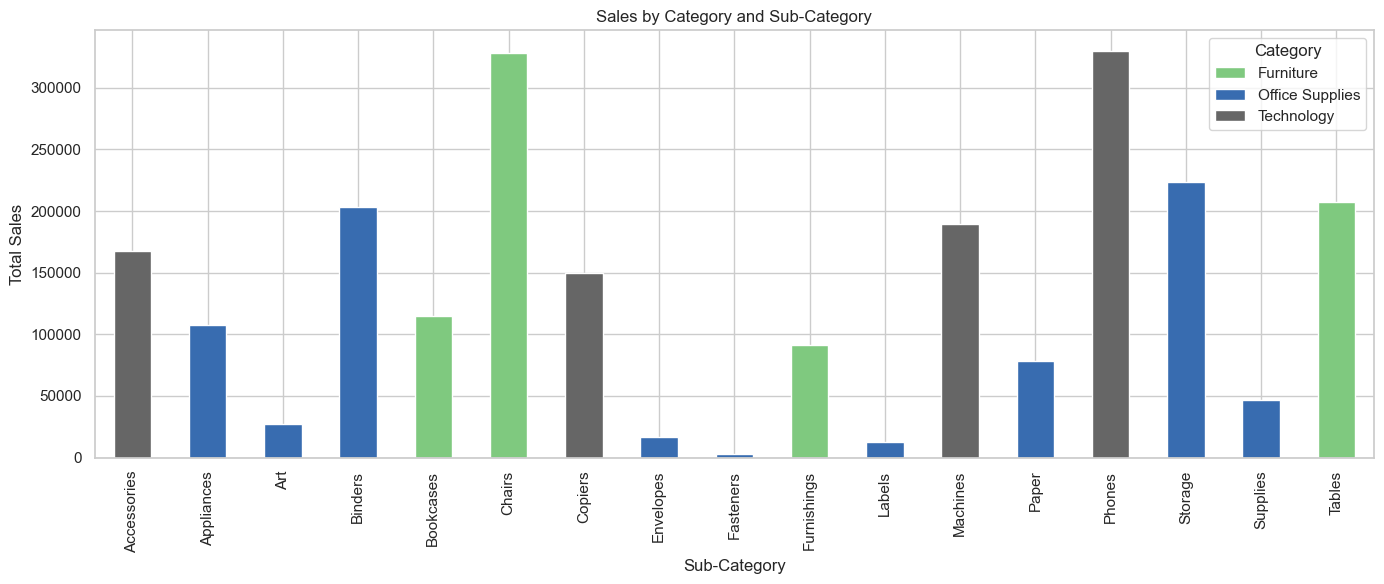

In [21]:
#Sales by Category and Sub-Category
category_sales = df.groupby(["Category", "Sub-Category"])["Sales"].sum().unstack().fillna(0)

plt.figure(figsize=(12,6))
category_sales.T.plot(kind="bar", stacked=True, figsize=(14,6), colormap="Accent")
plt.title("Sales by Category and Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

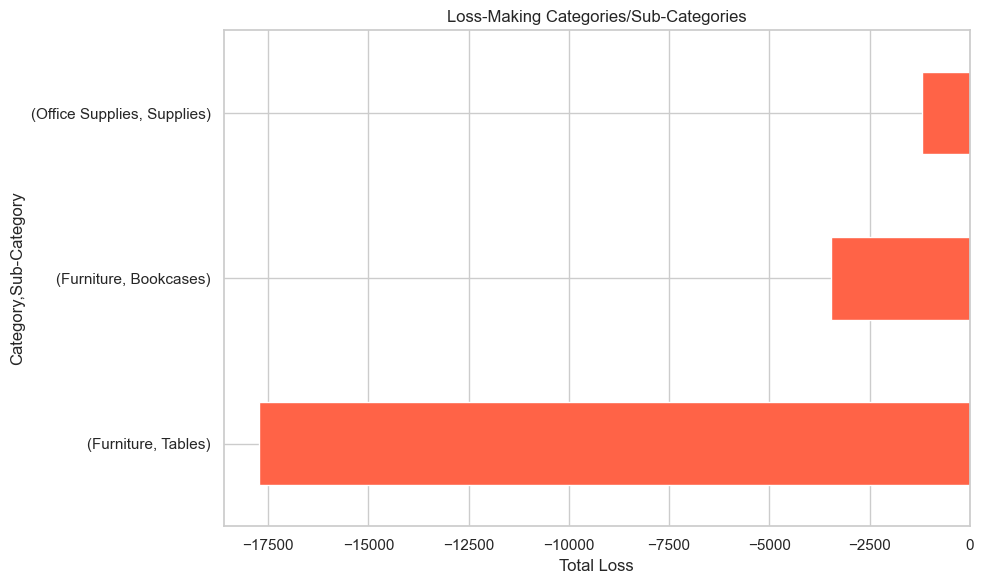

In [22]:
#Loss-Making Categories
loss_items = df.groupby(["Category", "Sub-Category"])["Profit"].sum()
loss_items = loss_items[loss_items < 0].sort_values()

plt.figure(figsize=(10,6))
loss_items.plot(kind='barh', color='tomato')
plt.title("Loss-Making Categories/Sub-Categories")
plt.xlabel("Total Loss")
plt.tight_layout()
plt.show()